## Установка библиотек

In [94]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('data/vodclickstream_uk_movies_03.csv')

In [8]:
df.head()

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287


In [9]:
df.shape

(671736, 8)

## Разделение данных по неделям

In [24]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')

In [27]:
df['period'] = df['datetime'].dt.to_period("W")

In [38]:

period = df['period'].unique().tolist()


In [67]:
columns = df.columns.to_list()
columns

['Unnamed: 0',
 'datetime',
 'duration',
 'title',
 'genres',
 'release_date',
 'movie_id',
 'user_id',
 'period']

In [58]:
week = [None]*len(period)
print(week)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [60]:
for i in range(len(week)):
    week[i] = df[df['period'] == period[i]].values.tolist()
        

In [68]:
for i in range(len(week)):
    week[i] = pd.DataFrame(week[i], columns=columns)

In [73]:
week[0].head()

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id,period
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe,2016-12-26/2017-01-01
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510,2016-12-26/2017-01-01
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf,2016-12-26/2017-01-01
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6,2016-12-26/2017-01-01
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287,2016-12-26/2017-01-01


### Посмотрим на средние значения по продолжительности 
#### За неделю сравнения возьмем первую

Отклонений не произошло


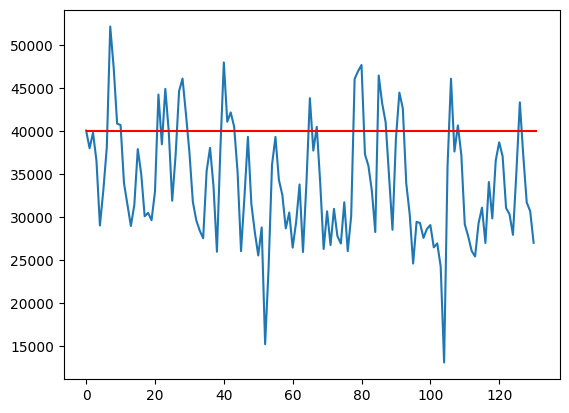

In [104]:
mean = week[0]['duration'].mean()
alpha = 0.05
means = []
means.append(mean)

for i in range(1,len(week)):

    _, p = st.mannwhitneyu(mean,week[i]['duration'].mean())
    means.append(week[i]['duration'].mean())
    if(p<0.05):
        print(f"На {i}-ой неделе произшло отклонение от медианы")
        break

else:
    print("Отклонений не произошло")
    plt.plot(np.arange(0,len(week)), means)
    plt.hlines(mean, 0, len(week), colors='red')
    

Если посмотреть на график, то можно заметить, как среднее значение по неделяем колеблится относительно первой недели.
Так же есть некоторое убывание среднего просмотра просмотра. Так пики в начале отсчета были выше 45000, то в конце в основном меньше, даже ниже первой неделе

### Посмотрим на медианные значения (дискретные)

#### Будем сравнивать медианы соседних недель для жанра комедия

Отклонений не произошло


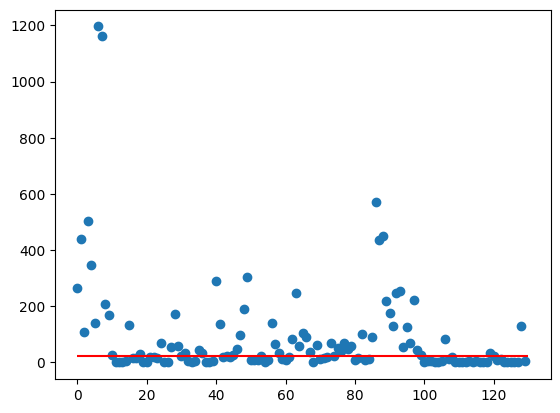

In [103]:
medians = []
for i in range(1,len(week)):
    median1 = week[i-1][week[i-1]['genres'].apply(lambda x : True if 'Comedy' in x.split(',') else False)]['duration'].median()
    median2 = week[i][week[i]['genres'].apply(lambda x : True if 'Comedy' in x.split(',') else False)]['duration'].median()
    medians.append(median1)
    _, p = st.mannwhitneyu(median1,median2)

    if(p<0.05):
        print(f"На {i}-ой неделе произшло отклонение от медианы")
        break

else:
    print("Отклонений не произошло")
    plt.scatter(np.arange(0,len(medians)), medians)
    plt.hlines(np.median(medians), 0, len(medians), colors='red')

Медианные значения для недель, в которых пользователями были просмотрены видео в жанре комедия, примерно большая часть находится в одном значении, вследствие чего можно говорить о неизменности распределения